In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

years=range(1880, 2017)

pieces = []
columns = [ 'name', 'sex', 'births' ]
for year in years:
    path = 'C:/Users/User/Desktop/python/pandas/Pandas_Python3/names/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index = True)

In [2]:
male_names  = names[names.sex == 'M']
male_names.head()

,name,sex,births,year
942,John,M,9655,1880
943,William,M,9532,1880
944,James,M,5927,1880
945,Charles,M,5348,1880
946,George,M,5126,1880


In [3]:
female_names  = names[names.sex == 'F']
female_names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [4]:
names.shape

(1891894, 4)

In [5]:
len(pd.DataFrame(male_names['name']).merge(pd.DataFrame(female_names['name'])).name)

15849766

In [6]:
pd.DataFrame(male_names['name']).merge(pd.DataFrame(female_names['name'])).name

0              John
1              John
2              John
3              John
4              John
5              John
6              John
7              John
8              John
9              John
10             John
11             John
12             John
13             John
14             John
15             John
16             John
17             John
18             John
19             John
20             John
21             John
22             John
23             John
24             John
25             John
26             John
27             John
28             John
29             John
             ...   
15849736    Yabsera
15849737    Yabsera
15849738     Yaqeen
15849739     Yunuen
15849740     Yunuen
15849741     Yunuen
15849742     Yunuen
15849743     Yunuen
15849744     Yunuen
15849745     Yunuen
15849746     Yunuen
15849747     Yunuen
15849748     Yunuen
15849749     Yunuen
15849750     Yunuen
15849751     Yunuen
15849752     Yunuen
15849753     Yunuen
15849754     Yunuen


In [7]:
pd.unique(pd.DataFrame(male_names['name']).merge(pd.DataFrame(female_names['name'])).name)

array(['John', 'William', 'James', ..., 'Yabsera', 'Yaqeen', 'Yunuen'], dtype=object)

In [8]:
common_names = pd.unique(pd.DataFrame(male_names['name']).merge(pd.DataFrame(female_names['name'])).name)
common_names

array(['John', 'William', 'James', ..., 'Yabsera', 'Yaqeen', 'Yunuen'], dtype=object)

In [17]:
len(common_names) #колво общих уникальных имен

10521

In [10]:
# кол-во за каждый год отдельно
#names_counts = names[names.isin(common_names)].groupby(['name', '']).size().reset_index(name='counts')
names_counts = names[names['name'].isin(common_names)].drop('year',axis=1).groupby(['name']).sum().sort_values('births',ascending=False)

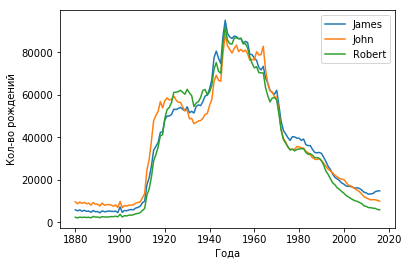

In [16]:
james = names[(names.name == 'James') ]
years = []
births = []
for year, subset in james.groupby('year'):
    years.append(year)
    births.append(subset.births.sum())

    
plt.plot(years, births)

james = names[ (names.name == 'John') ]
years = []
births = []
for year, subset in james.groupby('year'):
    years.append(year)
    births.append(subset.births.sum())

    
plt.plot(years, births)


james = names[ (names.name == 'Robert')]
years = []
births = []
for year, subset in james.groupby('year'):
    years.append(year)
    births.append(subset.births.sum())

    
plt.plot(years, births)
plt.xlabel('Года')
plt.ylabel('Кол-во рождений')
plt.legend(['James', 'John', 'Robert'])
plt.show()